In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn.neighbors import DistanceMetric

In [2]:
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km


In [3]:
d1 = pd.read_csv("0_VED_orig_data.csv")
d1.head(10)

/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (41,42,45,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,date,datetime,daynum,vehid,trip,timestamp_ms,lat,lon,speed_kmh,maf_gsec,engine_rpm,absoluteload,oat_degc,fuelrate_lhr,airconditioning_kw,airconditioning_w,heaterpower_w,hvbattery_a,hvbattery_soc_per,hvbattery_v,shorttermfueltrimbank1_pct,shorttermfueltrimbank2_pct,longtermfueltrimbank1_pct,longtermfueltrimbank2_pct,sub_trip_gid,sub_trip,mm_edge_id,mm_direction,mm_edge_source_h,mm_edge_target_h,mm_edge_km,mm_edge_kmh,mm_edge_clazzs,mm_edge_frcalong,mm_score,t1,t2,heavyfog,hourlydewpointtemperature,hourlydrybulbtemperature,hourlyprecipitation,hourlypresentweathertype,hourlyrelativehumidity,hourlyskyconditions,hourlyvisibility,hourlywetbulbtemperature,hourlywinddirection,hourlywindspeed,tstorms
0,0,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,0,42.277066,-83.763404,53.590000,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,-21.5,96.341469,386.0,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
1,1,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,200,42.277066,-83.763404,51.980000,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,-21.5,96.341469,386.0,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
2,2,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,1200,42.277066,-83.763404,50.369999,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,-21.5,96.341469,386.0,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
3,3,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,1500,42.277066,-83.763404,50.369999,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,23.5,96.341469,390.5,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
4,4,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,2300,42.277066,-83.763404,49.799999,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,23.5,96.341469,390.5,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
5,5,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,3300,42.277066,-83.763404,51.570000,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,23.5,96.341469,390.5,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
6,6,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,4400,42.277066,-83.763404,52.939999,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,23.5,96.341469,390.5,NaN,NaN,NaN,NaN,1,1,643877,-1.0,265.702667,269.904816,0.093738,48,highway.tertiary,0.265899,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
7,7,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,5000,42.277254,-83.762512,52.939999,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,23.5,96.341469,390.5,NaN,NaN,NaN,NaN,1,1,643876,-1.0,263.271210,265.702667,0.109077,48,highway.tertiary,0.529083,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
8,8,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,5400,42.277254,-83.762512,54.299999,NaN,NaN,NaN,5.0,NaN,NaN,0,2250,23.5,96.341469,390.5,NaN,NaN,NaN,NaN,1,1,643876,-1.0,263.271210,265.702667,0.109077,48,highway.tertiary,0.529083,0.981818,2017-11-02 16:53:00,2017-11-02 17:53:00,NaN,58.0,59.0,T,BR:1 ||,96.0,SCT:04 14 BKN:07 21 OVC:08 30,6,58.0,170,7.0,NaN
9,9,2017-11-02,2017-11-02 17:16:00,1.719774,10,1558,6000,

In [4]:
mm = np.unique(d1['mm_edge_id'])
len(mm)

2131

In [5]:
mm = np.unique(d1['trip'])
len(mm)

482

In [6]:
d1.shape

(408058, 50)

In [7]:
grouped_df = d1.groupby(["lat", "lon"]) 
first_values = grouped_df.first()
first_values = first_values.reset_index() 
first_values.shape

(58164, 50)

In [8]:
first_values

,lat,lon,Unnamed: 0,date,datetime,daynum,vehid,trip,timestamp_ms,speed_kmh,maf_gsec,engine_rpm,absoluteload,oat_degc,fuelrate_lhr,airconditioning_kw,airconditioning_w,heaterpower_w,hvbattery_a,hvbattery_soc_per,hvbattery_v,shorttermfueltrimbank1_pct,shorttermfueltrimbank2_pct,longtermfueltrimbank1_pct,longtermfueltrimbank2_pct,sub_trip_gid,sub_trip,mm_edge_id,mm_direction,mm_edge_source_h,mm_edge_target_h,mm_edge_km,mm_edge_kmh,mm_edge_clazzs,mm_edge_frcalong,mm_score,t1,t2,heavyfog,hourlydewpointtemperature,hourlydrybulbtemperature,hourlyprecipitation,hourlypresentweathertype,hourlyrelativehumidity,hourlyskyconditions,hourlyvisibility,hourlywetbulbtemperature,hourlywinddirection,hourlywindspeed,tstorms
0,42.220368,-83.734514,314205,2018-06-24,2018-06-24 23:40:00,235.986177,455,1795,1312900,79.889999,NaN,NaN,NaN,23.0,NaN,NaN,0,0,-22.5,66.341469,378.5,NaN,NaN,NaN,NaN,2667,2,626173,-1.0,250.405884,251.333847,0.268277,72,highway.tertiary,0.950864,0.977744,2018-06-24 22:53:00,2018-06-24 23:53:00,NaN,58.0,59.0,0.00,NaN,96.0,CLR:00,10,58.0,0,0.0,NaN
1,42.220727,-83.778440,264896,2018-05-04,2018-05-04 21:47:00,184.908050,455,1509,1077600,93.389999,NaN,NaN,NaN,28.5,NaN,NaN,350,0,-54.5,62.804878,375.5,NaN,NaN,NaN,NaN,2360,3,97995,-1.0,257.353607,255.524551,0.627469,88,highway.tertiary,0.149287,0.982365,2018-05-04 20:53:00,2018-05-04 21:53:00,NaN,49.0,56.0,0.00,NaN,77.0,CLR:00,10,52.0,240,3.0,NaN
2,42.220731,-83.778531,314198,2018-06-24,2018-06-24 23:40:00,235.986177,455,1795,393900,86.229996,NaN,NaN,NaN,24.0,NaN,NaN,0,0,-17.5,77.682938,381.0,NaN,NaN,NaN,NaN,2666,1,97995,1.0,257.353607,255.524551,0.627469,88,highway.tertiary,0.148238,0.971494,2018-06-24 22:53:00,2018-06-24 23:53:00,NaN,58.0,59.0,0.00,NaN,96.0,CLR:00,10,58.0,0,0.0,NaN
3,42.220895,-83.734879,314212,2018-06-24,2018-06-24 23:40:00,235.986177,455,1795,1316000,81.430000,NaN,NaN,NaN,23.0,NaN,NaN,0,0,-44.0,66.341469,378.5,NaN,NaN,NaN,NaN,2667,2,626173,-1.0,250.405884,251.333847,0.268277,72,highway.tertiary,0.705144,0.977744,2018-06-24 22:53:00,2018-06-24 23:53:00,NaN,58.0,59.0,0.00,NaN,96.0,CLR:00,10,58.0,0,0.0,NaN
4,42.220927,-83.778316,253346,2018-04-22,2018-04-22 21:47:00,172.908120,455,1418,1180200,85.849998,NaN,NaN,NaN,12.5,NaN,NaN,0,0,-30.0,64.024391,371.5,NaN,NaN,NaN,NaN,2297,2,97995,-1.0,257.353607,255.524551,0.627469,88,highway.tertiary,0.114211,0.963944,2018-04-22 20:53:00,2018-04-22 21:53:00,NaN,25.0,47.0,0,NaN,42.0,CLR:00,10,38.0,030,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58159,42.324194,-83.704580,342743,2018-08-30,2018-08-30 16:10:00,302.673673,455,2052,140000,126.029999,NaN,NaN,NaN,30.5,NaN,NaN,950,0,-74.5,88.414635,378.5,NaN,NaN,NaN,NaN,2866,1,641311,1.0,291.591705,290.920929,0.628766,112,highway.motorway,0.800109,0.952059,2018-08-30 15:53:00,2018-08-30 16:53:00,NaN,55.0,74.0,NaN,NaN,52.0,FEW:02 50,10,63.0,210,3.0,NaN
58160,42.324242,-83.705841,342751,2018-08-30,2018-08-30 16:10:00,302.673673,455,2052,143000,128.489990,NaN,NaN,NaN,30.5,NaN,NaN,950,0,-91.5,88.414635,375.5,NaN,NaN,NaN,NaN,2866,1,641311,1.0,291.591705,290.920929,0.628766,112,highway.motorway,0.965108,0.952059,2018-08-30 15:53:00,2018-08-30 16:53:00,NaN,55.0,74.0,NaN,NaN,52.0,FEW:02 50,10,63.0,210,3.0,NaN
58161,42.324275,-83.709637,342769,2018-08-30,2018-08-30 16:10:00,302.673673,455,2052,151900,129.000000,NaN,NaN,NaN,30.5,NaN,NaN,950,0,-63.5,88.414635,376.5,NaN,NaN,NaN,NaN,2866,1,641309,1.0,291.800720,284.077942,1.842581,112,highway.motorway,0.065662,0.952059,2018-08-30 15:53:00,2018-08-30 16:53:00,NaN,55.0,74.0,NaN,NaN,52.0,FEW:02 50,10,63.0,210,3.0,NaN
58162,42.324288,-83.707102,342756,2018-08-30,2018-08-30 16:10:00,302.673673,455,2052,145900,127.860001,NaN,NaN,NaN,30.5,NaN,NaN,950,0,-77.0,88.414635,375.5,NaN,NaN,NaN,NaN,2866,1,685768,NaN,290.920929,291.932129,0.115079,112,highway.motorway,0.577948,0.952059,2018-08-30 15:53:00

In [9]:
grouped_df = first_values.groupby(["trip", "mm_edge_id"]) 
vals = grouped_df.first()
vals = vals.reset_index() 
vals.shape

(19348, 50)

In [10]:
vals

,trip,mm_edge_id,lat,lon,Unnamed: 0,date,datetime,daynum,vehid,timestamp_ms,speed_kmh,maf_gsec,engine_rpm,absoluteload,oat_degc,fuelrate_lhr,airconditioning_kw,airconditioning_w,heaterpower_w,hvbattery_a,hvbattery_soc_per,hvbattery_v,shorttermfueltrimbank1_pct,shorttermfueltrimbank2_pct,longtermfueltrimbank1_pct,longtermfueltrimbank2_pct,sub_trip_gid,sub_trip,mm_direction,mm_edge_source_h,mm_edge_target_h,mm_edge_km,mm_edge_kmh,mm_edge_clazzs,mm_edge_frcalong,mm_score,t1,t2,heavyfog,hourlydewpointtemperature,hourlydrybulbtemperature,hourlyprecipitation,hourlypresentweathertype,hourlyrelativehumidity,hourlyskyconditions,hourlyvisibility,hourlywetbulbtemperature,hourlywinddirection,hourlywindspeed,tstorms
0,554,161632,42.244299,-83.732130,138598,2017-11-05,2017-11-05 16:45:00,4.698313,455,92900,63.349998,NaN,NaN,NaN,11.5,NaN,NaN,0,0,21.5,48.414635,366.5,NaN,NaN,NaN,NaN,1428,2,-1.0,257.032440,259.683960,0.052888,64,highway.secondary,0.619099,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN
1,554,161633,42.244276,-83.733168,138590,2017-11-05,2017-11-05 16:45:00,4.698313,455,87900,64.809998,NaN,NaN,NaN,11.5,NaN,NaN,0,0,-67.0,48.414635,365.0,NaN,NaN,NaN,NaN,1428,2,-1.0,259.683960,255.855148,0.104003,64,highway.secondary,0.627585,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN
2,554,161636,42.243874,-83.739069,138546,2017-11-05,2017-11-05 16:45:00,4.698313,455,57900,50.369999,NaN,NaN,NaN,11.5,NaN,NaN,0,0,-59.5,48.414635,367.5,NaN,NaN,NaN,NaN,1428,2,1.0,262.023315,263.292450,0.031760,64,highway.secondary,0.459985,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN
3,554,552278,42.244407,-83.729035,138622,2017-11-05,2017-11-05 16:45:00,4.698313,455,107900,61.669998,NaN,NaN,NaN,11.5,NaN,NaN,400,0,30.5,47.682930,376.5,NaN,NaN,NaN,NaN,1428,2,1.0,255.485046,253.001373,0.093415,56,highway.secondary,0.651871,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN
4,554,552279,42.244633,-83.728136,138629,2017-11-05,2017-11-05 16:45:00,4.698313,455,112900,54.059998,NaN,NaN,NaN,11.5,NaN,NaN,400,0,30.0,47.682930,373.0,NaN,NaN,NaN,NaN,1428,2,1.0,253.001373,252.563278,0.057038,56,highway.secondary,0.832207,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19343,3271,629907,42.302562,-83.704803,138518,2018-11-10,2018-11-10 11:59:00,374.499878,10,418000,37.809998,NaN,NaN,NaN,4.5,NaN,NaN,400,500,38.5,96.341469,390.5,NaN,NaN,NaN,NaN,1426,4,1.0,276.844635,276.238922,0.059170,56,highway.secondary,0.390521,0.986907,2018-11-10 11:53:00,2018-11-10 12:39:00,NaN,26.0,32.0,0,NaN,79.0,OVC:08 21,10,30.0,250,17.0,NaN
19344,3271,641960,42.302539,-83.708556,138451,2018-11-10,2018-11-10 11:59:00,374.499878,10,388000,0.000000,NaN,NaN,NaN,4.5,NaN,NaN,500,500,-5.0,96.585373,387.0,NaN,NaN,NaN,NaN,1426,4,1.0,272.371124,274.842346,0.335144,56,highway.secondary,0.886602,0.986907,2018-11-10 11:53:00,2018-11-10 12:39:00,NaN,26.0,32.0,0,NaN,79.0,OVC:08 21,10,30.0,250,17.0,NaN
19345,3271,742608,42.302537,-83.707072,138492,2018-11-10,2018-11-10 11:59:00,374.499878,10,405900,57.180000,NaN,NaN,NaN,4.5,NaN,NaN,400,500,-131.5,96.341469,370.0,NaN,NaN,NaN,NaN,1426,4,1.0,275.128296,276.009674,0.057961,56,highway.secondary,0.265234,0.986907,2018-11-10 11:53:00,2018-11-10 12:39:00,NaN,26.0,32.0,0,NaN,79.0,OVC:08 21,10,30.0,250,17.0,NaN
19346,3271,742609,42.302537,-83.707573,138484,2018-11-10,2018-11-10 11:59:00,374.499878,10,402900,31.199999,NaN,NaN,NaN,4.5,NaN,NaN,400,500,-96.5,96.341469,387.0,NaN,NaN,

In [11]:
def find_ratio(df):

    t_max = np.max(pd.to_datetime(df['timestamp_ms']).astype('int64')) 
    t_min = np.min(pd.to_datetime(df['timestamp_ms']).astype('int64')) 
    dif = (t_max - t_min) / 1e3
    
    return(dif)

In [12]:
def find_ratio_soc(df):

    t_max = np.max(df['hvbattery_soc_per'])
    t_min = np.min(df['hvbattery_soc_per'])
    dif = (t_max - t_min)
    
    return(dif)

In [13]:
tim = first_values[["trip", "mm_edge_id",'timestamp_ms']].groupby(["trip", "mm_edge_id"]).apply(find_ratio)

In [14]:
tim.to_numpy().shape

(19348,)

In [15]:
sped = first_values[["speed_kmh", "trip", "mm_edge_id"]].groupby(["trip", "mm_edge_id"]).apply(np.mean)


In [16]:
en = first_values[["trip", "mm_edge_id",'hvbattery_soc_per']].groupby(["trip", "mm_edge_id"]).apply(find_ratio_soc)

In [17]:
np.min(en), np.max(en)

(0.0, 26.463417053300006)

In [22]:
vals['speed'] = sped['speed_kmh'].to_numpy()
vals['tim'] = tim.to_numpy()
vals['ev_kwh'] = en.to_numpy()

In [23]:
vals.head()

,trip,mm_edge_id,lat,lon,Unnamed: 0,date,datetime,daynum,vehid,timestamp_ms,speed_kmh,maf_gsec,engine_rpm,absoluteload,oat_degc,fuelrate_lhr,airconditioning_kw,airconditioning_w,heaterpower_w,hvbattery_a,hvbattery_soc_per,hvbattery_v,shorttermfueltrimbank1_pct,shorttermfueltrimbank2_pct,longtermfueltrimbank1_pct,longtermfueltrimbank2_pct,sub_trip_gid,sub_trip,mm_direction,mm_edge_source_h,mm_edge_target_h,mm_edge_km,mm_edge_kmh,mm_edge_clazzs,mm_edge_frcalong,mm_score,t1,t2,heavyfog,hourlydewpointtemperature,hourlydrybulbtemperature,hourlyprecipitation,hourlypresentweathertype,hourlyrelativehumidity,hourlyskyconditions,hourlyvisibility,hourlywetbulbtemperature,hourlywinddirection,hourlywindspeed,tstorms,speed,tim,ev_kwh
0,554,161632,42.244299,-83.732130,138598,2017-11-05,2017-11-05 16:45:00,4.698313,455,92900,63.349998,NaN,NaN,NaN,11.5,NaN,NaN,0,0,21.5,48.414635,366.5,NaN,NaN,NaN,NaN,1428,2,-1.0,257.032440,259.683960,0.052888,64,highway.secondary,0.619099,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN,63.349998,0.0,0.0
1,554,161633,42.244276,-83.733168,138590,2017-11-05,2017-11-05 16:45:00,4.698313,455,87900,64.809998,NaN,NaN,NaN,11.5,NaN,NaN,0,0,-67.0,48.414635,365.0,NaN,NaN,NaN,NaN,1428,2,-1.0,259.683960,255.855148,0.104003,64,highway.secondary,0.627585,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN,64.809998,0.0,0.0
2,554,161636,42.243874,-83.739069,138546,2017-11-05,2017-11-05 16:45:00,4.698313,455,57900,50.369999,NaN,NaN,NaN,11.5,NaN,NaN,0,0,-59.5,48.414635,367.5,NaN,NaN,NaN,NaN,1428,2,1.0,262.023315,263.292450,0.031760,64,highway.secondary,0.459985,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN,50.369999,0.0,0.0
3,554,552278,42.244407,-83.729035,138622,2017-11-05,2017-11-05 16:45:00,4.698313,455,107900,61.669998,NaN,NaN,NaN,11.5,NaN,NaN,400,0,30.5,47.682930,376.5,NaN,NaN,NaN,NaN,1428,2,1.0,255.485046,253.001373,0.093415,56,highway.secondary,0.651871,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN,61.669998,0.0,0.0
4,554,552279,42.244633,-83.728136,138629,2017-11-05,2017-11-05 16:45:00,4.698313,455,112900,54.059998,NaN,NaN,NaN,11.5,NaN,NaN,400,0,30.0,47.682930,373.0,NaN,NaN,NaN,NaN,1428,2,1.0,253.001373,252.563278,0.057038,56,highway.secondary,0.832207,0.977944,2017-11-05 15:53:00,2017-11-05 16:51:00,NaN,59.0,59.0,0.01,NaN,100.0,BKN:07 60 BKN:07 70 OVC:08 110,10,59.0,230,8.0,NaN,54.059998,0.0,0.0


In [24]:
import matplotlib.pyplot as plt

(array([1.9034e+04, 8.2000e+01, 6.5000e+01, 6.9000e+01, 4.6000e+01,
        4.0000e+01, 9.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,  275.19,  550.38,  825.57, 1100.76, 1375.95, 1651.14,
        1926.33, 2201.52, 2476.71, 2751.9 ]),
 <BarContainer object of 10 artists>)

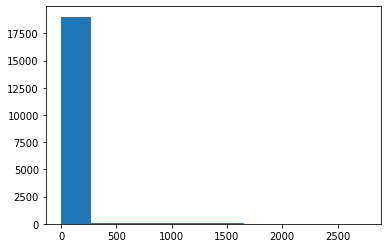

In [25]:
plt.hist(vals['tim'])

In [26]:
def inf(data, col):
    print(len(np.unique(data[col])), np.unique(data[col]))
    print(data[col].describe())

In [27]:
d1.columns

Index(['Unnamed: 0', 'date', 'datetime', 'daynum', 'vehid', 'trip',
       'timestamp_ms', 'lat', 'lon', 'speed_kmh', 'maf_gsec', 'engine_rpm',
       'absoluteload', 'oat_degc', 'fuelrate_lhr', 'airconditioning_kw',
       'airconditioning_w', 'heaterpower_w', 'hvbattery_a',
       'hvbattery_soc_per', 'hvbattery_v', 'shorttermfueltrimbank1_pct',
       'shorttermfueltrimbank2_pct', 'longtermfueltrimbank1_pct',
       'longtermfueltrimbank2_pct', 'sub_trip_gid', 'sub_trip', 'mm_edge_id',
       'mm_direction', 'mm_edge_source_h', 'mm_edge_target_h', 'mm_edge_km',
       'mm_edge_kmh', 'mm_edge_clazzs', 'mm_edge_frcalong', 'mm_score', 't1',
       't2', 'heavyfog', 'hourlydewpointtemperature',
       'hourlydrybulbtemperature', 'hourlyprecipitation',
       'hourlypresentweathertype', 'hourlyrelativehumidity',
       'hourlyskyconditions', 'hourlyvisibility', 'hourlywetbulbtemperature',
       'hourlywinddirection', 'hourlywindspeed', 'tstorms'],
      dtype='object')

In [28]:
np.unique(d1['mm_direction'])

array([-1.,  1., nan, ..., nan, nan, nan])

In [29]:
np.sum(np.isnan(np.unique(d1['hourlydewpointtemperature'])))

2181

In [30]:
inf(d1, 'trip')

482 [ 554  565  568  575  588  596  600  601  603  616  625  627  630  632
  635  636  646  658  659  668  669  672  673  674  678  690  693  694
  702  719  728  735  736  738  739  755  757  772  775  778  780  787
  792  795  799  803  808  816  825  834  845  869  876  883  887  896
  901  912  915  916  936  937  941  956  960  970  982  983  986  989
 1001 1006 1009 1026 1034 1035 1049 1064 1067 1070 1072 1073 1075 1076
 1083 1100 1108 1110 1111 1113 1117 1139 1143 1148 1149 1151 1153 1154
 1160 1168 1175 1179 1184 1197 1198 1204 1212 1221 1222 1243 1245 1261
 1262 1263 1292 1304 1306 1310 1320 1323 1338 1339 1340 1360 1363 1373
 1380 1384 1402 1405 1406 1409 1410 1413 1418 1421 1424 1427 1429 1435
 1453 1457 1461 1469 1474 1492 1493 1496 1509 1510 1511 1516 1520 1522
 1528 1531 1532 1533 1553 1558 1561 1562 1567 1568 1572 1573 1575 1578
 1582 1585 1586 1589 1591 1593 1594 1595 1596 1599 1600 1601 1602 1604
 1606 1607 1615 1624 1625 1629 1634 1635 1637 1638 1641 1644 1648 1652
 1

In [31]:
#'trip_id', -> trip
#'datekey', -> date
#'timekey', -> datetime
#'speed', -> speed_kmh
#'air_temperature', -> oat_degc
#'ev_kwh' -> hvbattery_soc_per
#'category', -> mm_edge_clazzs
#'wind_speed_ms', -> hourlywindspeed
#'wind_direction', -> hourlywinddirection
#'speedlimit_forward', -> mm_edge_kmh
#'speedlimit_backward', -> mm_edge_kmh
#'direction_x', -> mm_direction


#'trip_segmentno', 
#'segmentkey', 
#'segmentid', 
#'meters_driven', 
#'meters_segment', 
#'seconds', 
#'class', 
#'segangle',



In [60]:
data = vals[['trip', 'date', 'datetime', 'speed_kmh', 'oat_degc', 
          'hvbattery_soc_per', 'mm_direction', 'hourlywindspeed', 'hourlywinddirection', 
           'mm_edge_kmh', 'mm_edge_clazzs', 
          'lat','lon', 'speed', 'tim', 'ev_kwh']]
data.head()

,trip,date,datetime,speed_kmh,oat_degc,hvbattery_soc_per,mm_direction,hourlywindspeed,hourlywinddirection,mm_edge_kmh,mm_edge_clazzs,lat,lon,speed,tim,ev_kwh
0,554,2017-11-05,2017-11-05 16:45:00,63.349998,11.5,48.414635,-1.0,8.0,230,64,highway.secondary,42.244299,-83.732130,63.349998,0.0,0.0
1,554,2017-11-05,2017-11-05 16:45:00,64.809998,11.5,48.414635,-1.0,8.0,230,64,highway.secondary,42.244276,-83.733168,64.809998,0.0,0.0
2,554,2017-11-05,2017-11-05 16:45:00,50.369999,11.5,48.414635,1.0,8.0,230,64,highway.secondary,42.243874,-83.739069,50.369999,0.0,0.0
3,554,2017-11-05,2017-11-05 16:45:00,61.669998,11.5,47.682930,1.0,8.0,230,56,highway.secondary,42.244407,-83.729035,61.669998,0.0,0.0
4,554,2017-11-05,2017-11-05 16:45:00,54.059998,11.5,47.682930,1.0,8.0,230,56,highway.secondary,42.244633,-83.728136,54.059998,0.0,0.0


In [61]:
trips = np.unique(data['trip'])
trips

array([ 554,  565,  568,  575,  588,  596,  600,  601,  603,  616,  625,
        627,  630,  632,  635,  636,  646,  658,  659,  668,  669,  672,
        673,  674,  678,  690,  693,  694,  702,  719,  728,  735,  736,
        738,  739,  755,  757,  772,  775,  778,  780,  787,  792,  795,
        799,  803,  808,  816,  825,  834,  845,  869,  876,  883,  887,
        896,  901,  912,  915,  916,  936,  937,  941,  956,  960,  970,
        982,  983,  986,  989, 1001, 1006, 1009, 1026, 1034, 1035, 1049,
       1064, 1067, 1070, 1072, 1073, 1075, 1076, 1083, 1100, 1108, 1110,
       1111, 1113, 1117, 1139, 1143, 1148, 1149, 1151, 1153, 1154, 1160,
       1168, 1175, 1179, 1184, 1197, 1198, 1204, 1212, 1221, 1222, 1243,
       1245, 1261, 1262, 1263, 1292, 1304, 1306, 1310, 1320, 1323, 1338,
       1339, 1340, 1360, 1363, 1373, 1380, 1384, 1402, 1405, 1406, 1409,
       1410, 1413, 1418, 1421, 1424, 1427, 1429, 1435, 1453, 1457, 1461,
       1469, 1474, 1492, 1493, 1496, 1509, 1510, 15

In [62]:
idxes = np.ones(data.shape[0])
for i, trip in enumerate(trips):
    if i % 10 == 0:
        print(i)
    ids = np.array([x for x in range(data.shape[0])])
    tmp = (data['trip'] == trip)
    tmp_idx = ids[tmp]
    tmp_idx = tmp_idx[::10]
    idxes[tmp] = False
    idxes[tmp_idx] = True

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480


In [63]:
sum(tmp), len(tmp_idx)

(5, 1)

In [64]:
idxes = idxes.astype(np.bool)

In [65]:
data_filtered = data[idxes]

In [66]:
data_filtered.shape

(2152, 16)

In [67]:
data.shape

(19348, 16)

In [68]:
data_filtered = data

In [69]:
data_filtered.to_csv("./data/EVconsumption/0_filtered.csv")

In [70]:
data_ok = pd.DataFrame()

In [71]:
data_ok['trip_id'] = data_filtered['trip']
data_ok.shape

(19348, 1)

In [72]:
data_ok['trip_segmentno'] = -1


In [73]:
data_ok['segmentkey'] = -1

In [74]:
data_ok['segmentid'] = -1

In [75]:
data_ok['datekey'] = data_filtered['date'].str.replace('-','')

In [76]:
data_ok['direction_x'] = data_filtered['mm_direction']
data_ok['direction_x'] = data_ok['direction_x'].fillna(1)

In [77]:
data_ok['timekey'] = pd.to_datetime(data_filtered['datetime']).dt.strftime('%H%M')

In [78]:
data_ok['speed'] = data_filtered['speed']#data_filtered['speed_kmh']

In [79]:
data_ok['meters_driven'] = -1

In [80]:
data_ok['meters_segment'] = -1

In [81]:
data_ok['seconds'] = -1

In [82]:
data_ok['class'] = -1

In [83]:
data_ok['air_temperature'] = data_filtered['oat_degc']

In [84]:
data_ok['wind_direction'] = data_filtered['hourlywinddirection']
data_ok['wind_direction'] = data_ok['wind_direction'].fillna(0)

In [85]:
data_ok['wind_speed_ms'] = data_filtered['hourlywindspeed']
data_ok['wind_speed_ms'] = data_ok['wind_speed_ms'].fillna(0)

In [86]:
data_ok['category'] = data_filtered['mm_edge_clazzs'].str.replace('highway.','')

In [87]:
data_ok['segangle'] = 0

In [88]:
data_ok['speed_limit'] = data_filtered['mm_edge_kmh']

In [89]:
data_ok['speedlimit_forward'] = data_filtered['mm_edge_kmh']

In [90]:
data_ok['speedlimit_backward'] = data_filtered['mm_edge_kmh']

In [91]:
data_ok['none'] = 0 
data_ok['snow'] = 0 
data_ok['thunder'] = 0 
data_ok['fog'] = 0 
data_ok['drifting'] = 0 
data_ok['wet'] = 0 
data_ok['dry'] = 0 
data_ok['freezing'] = 0 



In [92]:
data_filtered['dist'] = haversine_vectorize(data_filtered['lon'], 
                           data_filtered['lat'], 
                           data_filtered['lon'].shift(), 
                           data_filtered['lat'].shift())

<ipython-input-92-ca8c9dd89b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'] = haversine_vectorize(data_filtered['lon'],


In [93]:
data_filtered['ev_kwh'] = data_filtered['ev_kwh']#.shift() - data_filtered['hvbattery_soc_per'] 

<ipython-input-93-616b75dbc514>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh'] = data_filtered['ev_kwh']#.shift() - data_filtered['hvbattery_soc_per']


In [94]:
data_filtered.head(10)

,trip,date,datetime,speed_kmh,oat_degc,hvbattery_soc_per,mm_direction,hourlywindspeed,hourlywinddirection,mm_edge_kmh,mm_edge_clazzs,lat,lon,speed,tim,ev_kwh,dist
0,554,2017-11-05,2017-11-05 16:45:00,63.349998,11.5,48.414635,-1.0,8.0,230,64,highway.secondary,42.244299,-83.732130,63.349998,0.0,0.0,NaN
1,554,2017-11-05,2017-11-05 16:45:00,64.809998,11.5,48.414635,-1.0,8.0,230,64,highway.secondary,42.244276,-83.733168,64.809998,0.0,0.0,0.085386
2,554,2017-11-05,2017-11-05 16:45:00,50.369999,11.5,48.414635,1.0,8.0,230,64,highway.secondary,42.243874,-83.739069,50.369999,0.0,0.0,0.487483
3,554,2017-11-05,2017-11-05 16:45:00,61.669998,11.5,47.682930,1.0,8.0,230,56,highway.secondary,42.244407,-83.729035,61.669998,0.0,0.0,0.827505
4,554,2017-11-05,2017-11-05 16:45:00,54.059998,11.5,47.682930,1.0,8.0,230,56,highway.secondary,42.244633,-83.728136,54.059998,0.0,0.0,0.078110
5,554,2017-11-05,2017-11-05 16:45:00,55.119999,11.5,48.414635,1.0,8.0,230,64,highway.secondary,42.243922,-83.738266,56.664999,5.2,0.0,0.837047
6,554,2017-11-05,2017-11-05 16:45:00,59.299999,11.5,48.414635,1.0,8.0,230,64,highway.secondary,42.244073,-83.736323,59.299999,0.0,0.0,0.160676
7,554,2017-11-05,2017-11-05 16:45:00,18.590000,11.5,48.414635,1.0,8.0,230,64,highway.secondary,42.243860,-83.740191,17.733334,9.8,0.0,0.319034
8,554,2017-11-05,2017-11-05 16:45:00,64.180000,11.5,48.414635,-1.0,8.0,230,64,highway.secondary,42.244214,-83.734257,64.180000,0.0,0.0,0.489731
9,554,2017-11-05,2017-11-05 16:45:00,59.209999,11.5,48.414635,1.0,8.0,230,64,highway.secondary,42.244154,-83.735283,59.209999,0.0,0.0,0.084701


In [95]:
data_filtered['ev_kwh'][:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: ev_kwh, dtype: float64

In [96]:
idxes = np.ones(data_filtered.shape[0])
for i, trip in enumerate(trips):
    ids = np.array([x for x in range(data_filtered.shape[0])])
    tmp = (data_filtered['trip'] == trip)
    tmp_idx = ids[tmp]
    idx = tmp_idx[0]
    data_filtered['dist'][idx] = 0
    data_filtered['ev_kwh'][idx] = 0


<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'][idx] = 0
/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh']

<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'][idx] = 0
/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh']

/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh'][idx] = 0
<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist']

<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'][idx] = 0
/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh']

<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'][idx] = 0
/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh']

<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'][idx] = 0
/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh']

<ipython-input-96-1347ff22da49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['dist'][idx] = 0
/media/linas/d303d4c4-4414-4763-bbc4-c7fb9be770c9/cpt/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  await eval(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-96-1347ff22da49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ev_kwh']

In [98]:
data_ok['seconds'] = data_filtered['tim']

In [101]:
data_ok.isnull().values.any()#, data_ok.isinf().values.any()

False

In [102]:
data_ok.head(20)

,trip_id,trip_segmentno,segmentkey,segmentid,datekey,direction_x,timekey,speed,meters_driven,meters_segment,seconds,class,air_temperature,wind_direction,wind_speed_ms,category,segangle,speed_limit,speedlimit_forward,speedlimit_backward,none,snow,thunder,fog,drifting,wet,dry,freezing
0,554,-1,-1,-1,20171105,-1.0,1645,63.349998,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
1,554,-1,-1,-1,20171105,-1.0,1645,64.809998,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
2,554,-1,-1,-1,20171105,1.0,1645,50.369999,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
3,554,-1,-1,-1,20171105,1.0,1645,61.669998,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,56,56,56,0,0,0,0,0,0,0,0
4,554,-1,-1,-1,20171105,1.0,1645,54.059998,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,56,56,56,0,0,0,0,0,0,0,0
5,554,-1,-1,-1,20171105,1.0,1645,56.664999,-1,-1,5.2,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
6,554,-1,-1,-1,20171105,1.0,1645,59.299999,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
7,554,-1,-1,-1,20171105,1.0,1645,17.733334,-1,-1,9.8,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
8,554,-1,-1,-1,20171105,-1.0,1645,64.180000,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0
9,554,-1,-1,-1,20171105,1.0,1645,59.209999,-1,-1,0.0,-1,11.5,230,8.0,secondary,0,64,64,64,0,0,0,0,0,0,0,0


In [103]:
data_ok.to_csv("1_VED_orig_data.csv")

In [164]:
data = data_ok

In [165]:
import datetime
def to_weekend(vals):
    weekDays = (0,0,0,0,0,1,1)
    values = []
    for v in vals:

        thisXMas    = datetime.date(int(str(v)[:4]), int(str(v)[4:6]), int(str(v)[6:]))
        thisXMasDay = thisXMas.weekday()
        thisXMasDayAsString = weekDays[thisXMasDay]
        values.append(thisXMasDayAsString)
    values = np.array(values)
    
    return values

In [166]:
data['weekend'] = to_weekend(data['datekey'])

In [167]:
data['timekey'] = data['timekey'].astype(np.int)

In [168]:
data['time'] = 1
data['time'][data['timekey'] < 600] = 0
data['time'][data['timekey'] > 2200] = 0
data['time'][np.logical_and(data['timekey'] > 700, data['timekey'] < 900)] = 2
data['time'][np.logical_and(data['timekey'] > 1500, data['timekey'] < 1700)] = 2         

<ipython-input-168-1df9b0e2d196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'][data['timekey'] < 600] = 0
<ipython-input-168-1df9b0e2d196>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'][data['timekey'] > 2200] = 0
<ipython-input-168-1df9b0e2d196>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'][np.logical_and(data['timekey'] > 700, data['timekey'] < 900)] = 2
<ipython-input-168-1df9b0e2d196>:

In [169]:
data['category'][:14] = ['living_street', 'motorway', 'motorway_link', 'primary',
       'residential', 'secondary', 'secondary_link', 'service',
       'tertiary', 'track', 'trunk', 'trunk_link', 'unclassified',
       'unpaved']

<ipython-input-169-66f1e7050c13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'][:14] = ['living_street', 'motorway', 'motorway_link', 'primary',
/home/linas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [170]:
data = pd.concat([data, pd.get_dummies(data['category'])], axis=1)

In [171]:
d1 = data.drop(['datekey', 'direction_x', 'timekey', 'class', 'category', 
               'speedlimit_forward','meters_segment',  'speedlimit_backward'], axis=1)
d1.head()

,trip_id,trip_segmentno,segmentkey,segmentid,speed,meters_driven,seconds,air_temperature,wind_direction,wind_speed_ms,segangle,speed_limit,none,snow,thunder,fog,drifting,wet,dry,freezing,ev_kwh,weekend,time,living_street,motorway,motorway_link,primary,primary_link,residential,secondary,secondary_link,service,tertiary,tertiary_link,track,trunk,trunk_link,unclassified,unpaved
0,554,-1,-1,-1,63.349998,-1,0.0,11.5,230,8.0,0,64,0,0,0,0,0,0,0,0,48.414635,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,554,-1,-1,-1,64.809998,-1,0.0,11.5,230,8.0,0,64,0,0,0,0,0,0,0,0,48.414635,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,554,-1,-1,-1,50.369999,-1,0.0,11.5,230,8.0,0,64,0,0,0,0,0,0,0,0,48.414635,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,554,-1,-1,-1,61.669998,-1,0.0,11.5,230,8.0,0,56,0,0,0,0,0,0,0,0,47.682930,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,554,-1,-1,-1,54.059998,-1,0.0,11.5,230,8.0,0,56,0,0,0,0,0,0,0,0,47.682930,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [172]:
d1.shape

(19348, 39)

In [173]:
d1.columns

Index(['trip_id', 'trip_segmentno', 'segmentkey', 'segmentid', 'speed',
       'meters_driven', 'seconds', 'air_temperature', 'wind_direction',
       'wind_speed_ms', 'segangle', 'speed_limit', 'none', 'snow', 'thunder',
       'fog', 'drifting', 'wet', 'dry', 'freezing', 'ev_kwh', 'weekend',
       'time', 'living_street', 'motorway', 'motorway_link', 'primary',
       'primary_link', 'residential', 'secondary', 'secondary_link', 'service',
       'tertiary', 'tertiary_link', 'track', 'trunk', 'trunk_link',
       'unclassified', 'unpaved'],
      dtype='object')

In [174]:
a = ['Unnamed: 0', 'trip_id', 'trip_segmentno', 'segmentkey', 'segmentid',
       'speed', 'meters_driven', 'seconds', 'air_temperature',
       'wind_direction', 'wind_speed_ms', 'segangle', 'ev_kwh', 'weekend',
       'speed_limit', 'time', 'drifting', 'dry', 'fog', 'freezing', 'none',
       'snow', 'thunder', 'wet', 'living_street', 'motorway', 'motorway_link',
       'primary', 'residential', 'secondary', 'secondary_link', 'service',
       'tertiary', 'track', 'trunk', 'trunk_link', 'unclassified', 'unpaved']


In [175]:
d1.dropna(axis = 0, how = 'any', inplace = True)

d2 = d1[d1['ev_kwh'].notna()]
d2 = d2[d2['wind_direction'].notna()]
d1.shape

(19348, 39)

In [176]:
d2['speed_avg_week'] = 0
for seg in np.unique(d2['segmentkey']):
    for val in np.unique(d2['weekend']):
        idx = d2['segmentkey'] == seg
        idx_w = d2['weekend'] == val
        ids = idx & idx_w
        speed = np.mean(d2[ids]['speed'])
        d2.loc[ids, 'speed_avg_week'] = speed
        #print(val)

In [177]:
d2['speed_avg_time'] = 0
for seg in np.unique(d2['segmentkey']):
    for tim in np.unique(d2['time']):
        idx = d2['segmentkey'] == seg
        idx_w = d2['time'] == tim
        ids = idx & idx_w
        speed = np.mean(d2[ids]['speed'])
        d2.loc[ids,'speed_avg_time'] = speed
        #print(val)
    

In [178]:
d2['speed_avg_week_time'] = 0
for seg in np.unique(d2['segmentkey']):
    for tim in np.unique(d2['time']):
        for val in np.unique(d2['weekend']):
            idx = d2['segmentkey'] == seg
            idx_w = d2['weekend'] == val
            idx_t = d2['time'] == tim
            ids = idx & idx_w & idx_t
            speed = np.mean(d2[ids]['speed'])
            d2.loc[ids, 'speed_avg_week_time'] = speed
            #print(val)

In [179]:
d2['speed_avg'] = 0
for seg in np.unique(d2['segmentkey']):
        idx = d2['segmentkey'] == seg
        ids = idx 
        speed = np.mean(d2[ids]['speed'])
        d2.loc[ids, 'speed_avg'] = speed
        #print(val)
    

In [180]:
d2.to_csv("2_VED_orig_data.csv")

In [181]:
df1 = d1.pop('trip_id') 
df2 = d1.pop('ev_kwh') 
df3 = d1.pop('trip_segmentno') 
d1['trip_id'] = df1 
d1['ev_kwh']  = df2 
d1['trip_segmentno'] = df3 
d1.head()

,segmentkey,segmentid,speed,meters_driven,seconds,air_temperature,wind_direction,wind_speed_ms,segangle,speed_limit,none,snow,thunder,fog,drifting,wet,dry,freezing,weekend,time,living_street,motorway,motorway_link,primary,primary_link,residential,secondary,secondary_link,service,tertiary,tertiary_link,track,trunk,trunk_link,unclassified,unpaved,trip_id,ev_kwh,trip_segmentno
0,-1,-1,63.349998,-1,0.0,11.5,230,8.0,0,64,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,554,48.414635,-1
1,-1,-1,64.809998,-1,0.0,11.5,230,8.0,0,64,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,554,48.414635,-1
2,-1,-1,50.369999,-1,0.0,11.5,230,8.0,0,64,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,554,48.414635,-1
3,-1,-1,61.669998,-1,0.0,11.5,230,8.0,0,56,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,554,47.682930,-1
4,-1,-1,54.059998,-1,0.0,11.5,230,8.0,0,56,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,554,47.682930,-1


In [182]:
d1.shape

(19348, 39)